# Calculate mean stacked image

(14, 125)


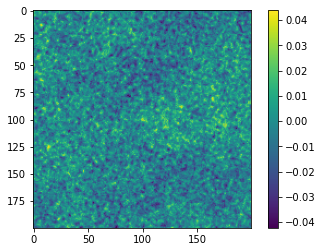

In [26]:
# Write your load_fits function here.
from astropy.io import fits
import numpy as np

def load_fits(file):
    hdulist = fits.open(file)
    data = hdulist[0].data
    return (np.where(data == data.max())[0][0],np.where(data == data.max())[1][0])

if __name__ == '__main__':
  # Run your `load_fits` function with examples:
  bright = load_fits('image2.fits')
  print(bright)

  # You can also confirm your result visually:
  from astropy.io import fits
  import matplotlib.pyplot as plt

  hdulist = fits.open('image2.fits')
  data = hdulist[0].data

  # Plot the 2D image data
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()

Write a mean_fits function that takes a list of FITS files as an argument, reads them in, and returns the mean image data of the FITS files. All the images have the same dimensions and your calculated mean array should match those dimensions.

Your function should be able to process an arbitrary number of files. If you're unsure how to do that, take a look at the sample solutions to the previous problems.

The mean stack of these files will be a large 200 x 200 array, so we will only look at the central value of your returned array, which is where we expect the pulsar to be.

For the files image0.fits, image1.fits and image2.fits, your program should work like this:

">>> mean_fits(['image0.fits', 'image1.fits', 'image2.fits'])[100, 100]
0.017356586332122486"

We can access the mean at x=100, y=100 using the index operator right after the function call, as we expect its return value to be an array. The central mean value for the files image0.fits, image1.fits, and image3.fits should be:

">>> mean_fits(['image0.fits', 'image1.fits', 'image3.fits'])[100, 100]
0.01006323037048181"
Using all the FITS files provided (images 0 to 4), your program should work like this:

">>> mean_fits(['image0.fits', 'image1.fits', 'image2.fits', 'image3.fits', 'image4.fits'])[100, 100]
0.014150320738554"


0.017356586332122486


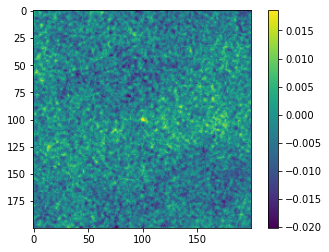

In [27]:
# Write your mean_fits function here:

from astropy.io import fits
import numpy as np

def mean_fits(files):
  n = len(files)
  if n > 0:
    
    hdulist = fits.open(files[0])
    data = hdulist[0].data
    hdulist.close()
    
    for i in range(1, n):
      hdulist = fits.open(files[i])
      data += hdulist[0].data
      hdulist.close()
    
    mean = data / n
    return mean


if __name__ == '__main__':
  
  # Test your function with examples from the question
  data  = mean_fits(['image0.fits', 'image1.fits', 'image2.fits'])
  print(data[100, 100])

  # You can also plot the result:
  import matplotlib.pyplot as plt
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()

In [28]:
mean_fits(['image0.fits', 'image1.fits', 'image3.fits'])[100, 100]

0.01006323037048181